In [10]:
import tensorflow

Image Path: C:/Users/Mahesh/Desktop/m/dataset\AN1.jpg


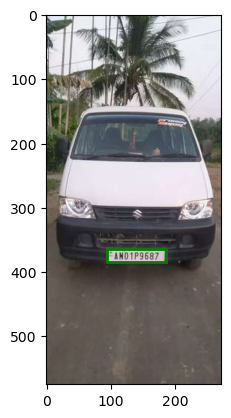

Image Path: C:/Users/Mahesh/Desktop/m/dataset\AN10.jpg


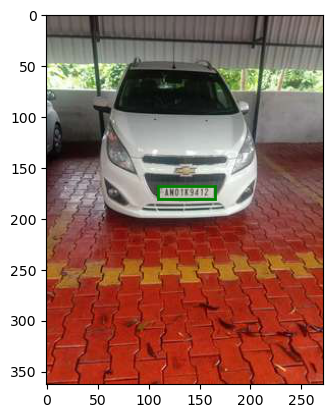

Image Path: C:/Users/Mahesh/Desktop/m/dataset\AN2.jpg


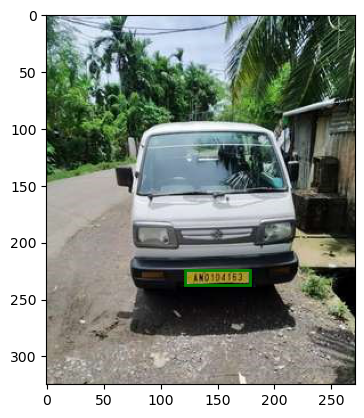

Image Path: C:/Users/Mahesh/Desktop/m/dataset\AN4.jpg


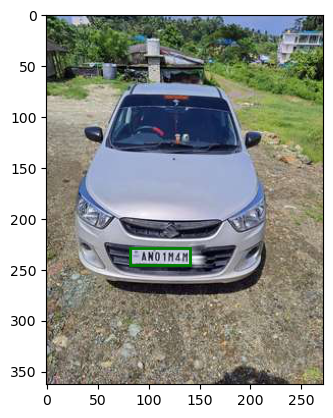

Image Path: C:/Users/Mahesh/Desktop/m/dataset\AN5.jpg


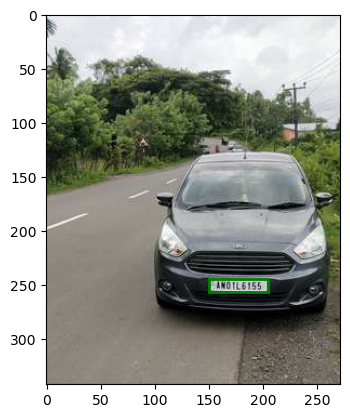

In [7]:
import pandas as pd
import seaborn as sns
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Both XML and image files are in the same folder
data_folder = "C:/Users/Mahesh/Desktop/m/dataset"

# Counter for the number of images processed
counter = 0

for file in os.listdir(data_folder):
    if file.endswith(".xml"):
        # Get the base name of the XML file (without the extension)
        base_name = os.path.splitext(file)[0]
        
        # Construct the image file name by adding the ".png" or ".jpg" extension
        # Check if the PNG file exists, otherwise use the JPG file
        if os.path.exists(os.path.join(data_folder, base_name + ".png")):
            image_file = base_name + ".png"
        else:
            image_file = base_name + ".jpg"
        
        # Construct the full paths to the XML and image files
        xml_path = os.path.join(data_folder, file)
        image_path = os.path.join(data_folder, image_file)
        print("Image Path:", image_path)
        
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        xmin = int(root.find("object/bndbox/xmin").text)
        ymin = int(root.find("object/bndbox/ymin").text)
        xmax = int(root.find("object/bndbox/xmax").text)
        ymax = int(root.find("object/bndbox/ymax").text)

        original_image = Image.open(image_path)

        fig, ax = plt.subplots(1)

        ax.imshow(original_image)

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none')

        ax.add_patch(rect)

        plt.show()

        # Increment the counter
        counter += 1

        # Break the loop after 5 images
        if counter >= 5:
            break


In [11]:
import cv2
import numpy as np
import os
import xml.etree.ElementTree as ET

data = []
output = []

# Both XML and image files are in the same folder
data_folder = "C:/Users/Mahesh/Desktop/m/dataset"

for file in os.listdir(data_folder):
    if file.endswith(".xml"):
        # Get the base name of the XML file (without the extension)
        base_name = os.path.splitext(file)[0]
        
        # Construct the image file name by adding the ".png" or ".jpg" extension
        # Check if the PNG file exists, otherwise use the JPG file
        if os.path.exists(os.path.join(data_folder, base_name + ".png")):
            image_file = base_name + ".png"
        elif os.path.exists(os.path.join(data_folder, base_name + ".jpg")):
            image_file = base_name + ".jpg"
        else:
            continue
        
        # Construct the full paths to the XML and image files
        xml_path = os.path.join(data_folder, file)
        image_path = os.path.join(data_folder, image_file)
        print("Processing image:", image_path)
        
        img_arr = cv2.imread(image_path)

        if img_arr is not None:
            h, w, d = img_arr.shape
            print("Image shape:", img_arr.shape)

            resized_image = cv2.resize(img_arr, (224, 224))

            norm_load_image_arr = resized_image.astype(np.float32) / 255.0

            tree = ET.parse(xml_path)
            root = tree.getroot()
            xmin = int(root.find("object/bndbox/xmin").text)
            xmax = int(root.find("object/bndbox/xmax").text)
            ymin = int(root.find("object/bndbox/ymin").text)
            ymax = int(root.find("object/bndbox/ymax").text)

            nxmin, nxmax = xmin / w, xmax / w
            nymin, nymax = ymin / h, ymax / h
            label_norm = (nxmin, nxmax, nymin, nymax) 
            
            data.append(norm_load_image_arr)
            output.append(label_norm)

if len(data) > 0:
    print("Image preprocessing completed successfully.")
else:
    print("No images were preprocessed.")


Processing image: C:/Users/Mahesh/Desktop/m/dataset\AN1.jpg
Image shape: (575, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AN10.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AN2.jpg
Image shape: (325, 271, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AN4.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AN5.jpg
Image shape: (342, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AN6.jpg
Image shape: (306, 271, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AN7.jpg
Image shape: (590, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AP1.jpg
Image shape: (204, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AP10.jpg
Image shape: (423, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AP12.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\AP13.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Deskt

Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars120.png
Image shape: (265, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars121.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars122.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars123.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars124.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars125.png
Image shape: (260, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars126.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars127.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars128.png
Image shape: (225, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars129.png
Image shape: (398, 530, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars13.png
Image shape: (268, 400, 3)


Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars207.png
Image shape: (478, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars208.png
Image shape: (268, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars209.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars21.png
Image shape: (301, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars210.png
Image shape: (266, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars211.png
Image shape: (295, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars212.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars213.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars214.png
Image shape: (243, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars215.png
Image shape: (225, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars216.png


Image shape: (307, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars29.png
Image shape: (299, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars290.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars291.png
Image shape: (303, 517, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars292.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars293.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars294.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars295.png
Image shape: (256, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars296.png
Image shape: (318, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars297.png
Image shape: (233, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars298.png
Image shape: (268, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars299.png


Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars376.png
Image shape: (265, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars377.png
Image shape: (225, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars378.png
Image shape: (307, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars379.png
Image shape: (353, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars38.png
Image shape: (400, 386, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars380.png
Image shape: (225, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars381.png
Image shape: (225, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars382.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars383.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars384.png
Image shape: (300, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars385.png


Image shape: (268, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars69.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars7.png
Image shape: (279, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars70.png
Image shape: (226, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars71.png
Image shape: (225, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars72.png
Image shape: (332, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars73.png
Image shape: (225, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars74.png
Image shape: (267, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars75.png
Image shape: (248, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars76.png
Image shape: (360, 480, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars77.png
Image shape: (270, 400, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\Cars78.png
Image shape

Image shape: (311, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA11.jpg
Image shape: (495, 271, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA12.jpg
Image shape: (272, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA13.jpg
Image shape: (242, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA2.jpg
Image shape: (590, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA3.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA4.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA5.jpg
Image shape: (204, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA6.jpg
Image shape: (604, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA7.jpg
Image shape: (226, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA8.jpg
Image shape: (119, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\GA9.jpg
Image shape: (363, 272, 3)
Processing im

Image shape: (153, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK1.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK10.jpg
Image shape: (204, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK11.jpg
Image shape: (593, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK12.jpg
Image shape: (328, 268, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK13.jpg
Image shape: (257, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK14.jpg
Image shape: (484, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK15.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK16.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK17.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK18.jpg
Image shape: (604, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\JK19.jpg
Image shape: (363, 272, 3)
Proces

Image shape: (604, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML19.jpg
Image shape: (483, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML2.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML20.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML21.jpg
Image shape: (243, 270, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML22.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML23.jpg
Image shape: (323, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML24.jpg
Image shape: (182, 271, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML25.jpg
Image shape: (425, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML26.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML27.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\ML28.jpg
Image shape: (363, 272, 3)
Proces

Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY15.jpg
Image shape: (342, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY16.jpg
Image shape: (204, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY17.jpg
Image shape: (204, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY18.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY2.jpg
Image shape: (333, 269, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY3.jpg
Image shape: (484, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY4.jpg
Image shape: (128, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY5.jpg
Image shape: (484, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY6.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY7.jpg
Image shape: (364, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\PY8.jpg
Image shape: (568, 272, 3)
Processing image: C:/Users/Mahesh/Deskt

Image shape: (364, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB22.jpg
Image shape: (364, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB23.jpg
Image shape: (216, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB25.jpg
Image shape: (172, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB26.jpg
Image shape: (186, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB27.jpg
Image shape: (281, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB28.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB3.jpg
Image shape: (204, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB4.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB5.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB6.jpg
Image shape: (363, 272, 3)
Processing image: C:/Users/Mahesh/Desktop/m/dataset\WB8.jpg
Image shape: (272, 272, 3)
Processing

In [12]:
from sklearn.model_selection import train_test_split

# Assuming data is your input and output is your target labels
X = np.array(data)
y = np.array(output)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Display the shapes of the resulting sets
print("Shapes of the sets:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes of the sets:
x_train shape: (780, 224, 224, 3)
x_test shape: (195, 224, 224, 3)
y_train shape: (780, 4)
y_test shape: (195, 4)


In [15]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf


inception_resnet = InceptionResNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
inception_resnet.trainable = True

# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500, activation="relu")(headmodel)
headmodel = Dense(250, activation="relu")(headmodel)
headmodel = Dense(4, activation='sigmoid')(headmodel)

model = Model(inputs=inception_resnet.input, outputs=headmodel)







In [16]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_406 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_406 (Batch  (None, 111, 111, 32  96         ['conv2d_406[0][0]']             
 Normalization)                 )                                                           

 batch_normalization_411 (Batch  (None, 25, 25, 96)  288         ['conv2d_411[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_413 (Batch  (None, 25, 25, 64)  192         ['conv2d_413[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_416 (Batch  (None, 25, 25, 96)  288         ['conv2d_416[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_417 (Batch  (None, 25, 25, 64)  192         ['conv2d_417[0][0]']             
 Normaliza

 activation_427 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_427[0][0]']
                                                                                                  
 conv2d_425 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_428 (Conv2D)            (None, 25, 25, 48)   13824       ['activation_427[0][0]']         
                                                                                                  
 batch_normalization_425 (Batch  (None, 25, 25, 32)  96          ['conv2d_425[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_428 (Batch  (None, 25, 25, 48)  144         ['conv2d_428[0][0]']             
 Normaliza

                                                                                                  
 activation_430 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_430[0][0]']
                                                                                                  
 activation_432 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_432[0][0]']
                                                                                                  
 activation_435 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_435[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_430[0][0]',         
                                                                  'activation_432[0][0]',         
                                                                  'activation_435[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_446 (Batch  (None, 25, 25, 48)  144         ['conv2d_446[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_443 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_443[0][0]']
                                                                                                  
 activation_446 (Activation)    (None, 25, 25, 48)   0           ['batch_normalization_446[0][0]']
                                                                                                  
 conv2d_442 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_448[0][0]',         
                                                                  'activation_450[0][0]',         
                                                                  'activation_453[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 25, 25, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 25, 25, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 25, 25, 320)  0           ['block35_6[0][0]']              
          

 activation_464 (Activation)    (None, 25, 25, 48)   0           ['batch_normalization_464[0][0]']
                                                                                                  
 conv2d_460 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_462 (Conv2D)            (None, 25, 25, 32)   9216        ['activation_461[0][0]']         
                                                                                                  
 conv2d_465 (Conv2D)            (None, 25, 25, 64)   27648       ['activation_464[0][0]']         
                                                                                                  
 batch_normalization_460 (Batch  (None, 25, 25, 32)  96          ['conv2d_460[0][0]']             
 Normalization)                                                                                   
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 25, 25, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_475 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_475 (Batch  (None, 25, 25, 32)  96          ['conv2d_475[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_475 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_475[0][0]']
          

 activation_481 (Activation)    (None, 12, 12, 384)  0           ['batch_normalization_481[0][0]']
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 12, 12, 320)  0          ['block35_10_ac[0][0]']          
 )                                                                                                
                                                                                                  
 mixed_6a (Concatenate)         (None, 12, 12, 1088  0           ['activation_478[0][0]',         
                                )                                 'activation_481[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_483 (Conv2D)            (None, 12, 12, 128)  139264      ['mixed_6a[0][0]']               
          

 block17_2 (Lambda)             (None, 12, 12, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 12, 12, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_491 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_491 (Batch  (None, 12, 12, 128)  384        ['conv2d_491[0][0]']             
 Normalization)                                                                                   
          

 block17_4_ac (Activation)      (None, 12, 12, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_499 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_499 (Batch  (None, 12, 12, 128)  384        ['conv2d_499[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_499 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_499[0][0]']
                                                                                                  
 conv2d_50

 conv2d_507 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_6_ac[0][0]']           
                                                                                                  
 batch_normalization_507 (Batch  (None, 12, 12, 128)  384        ['conv2d_507[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_507 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_507[0][0]']
                                                                                                  
 conv2d_508 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_507[0][0]']         
                                                                                                  
 batch_normalization_508 (Batch  (None, 12, 12, 160)  480        ['conv2d_508[0][0]']             
 Normaliza

 Normalization)                                                                                   
                                                                                                  
 activation_515 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_515[0][0]']
                                                                                                  
 conv2d_516 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_515[0][0]']         
                                                                                                  
 batch_normalization_516 (Batch  (None, 12, 12, 160)  480        ['conv2d_516[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_516 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_516[0][0]']
          

                                                                                                  
 conv2d_524 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_523[0][0]']         
                                                                                                  
 batch_normalization_524 (Batch  (None, 12, 12, 160)  480        ['conv2d_524[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_524 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_524[0][0]']
                                                                                                  
 conv2d_522 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_52

 batch_normalization_532 (Batch  (None, 12, 12, 160)  480        ['conv2d_532[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_532 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_532[0][0]']
                                                                                                  
 conv2d_530 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_533 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_532[0][0]']         
                                                                                                  
 batch_normalization_530 (Batch  (None, 12, 12, 192)  576        ['conv2d_530[0][0]']             
 Normaliza

 activation_540 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_540[0][0]']
                                                                                                  
 conv2d_538 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_541 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_540[0][0]']         
                                                                                                  
 batch_normalization_538 (Batch  (None, 12, 12, 192)  576        ['conv2d_538[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_541 (Batch  (None, 12, 12, 192)  576        ['conv2d_541[0][0]']             
 Normaliza

                                                                                                  
 conv2d_549 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_548[0][0]']         
                                                                                                  
 batch_normalization_546 (Batch  (None, 12, 12, 192)  576        ['conv2d_546[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_549 (Batch  (None, 12, 12, 192)  576        ['conv2d_549[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_546 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_546[0][0]']
          

 batch_normalization_554 (Batch  (None, 12, 12, 192)  576        ['conv2d_554[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_557 (Batch  (None, 12, 12, 192)  576        ['conv2d_557[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_554 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_554[0][0]']
                                                                                                  
 activation_557 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_557[0][0]']
                                                                                                  
 block17_1

                                                                                                  
 activation_562 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_562[0][0]']
                                                                                                  
 activation_564 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_564[0][0]']
                                                                                                  
 activation_567 (Activation)    (None, 12, 12, 288)  0           ['batch_normalization_567[0][0]']
                                                                                                  
 conv2d_563 (Conv2D)            (None, 5, 5, 384)    884736      ['activation_562[0][0]']         
                                                                                                  
 conv2d_565 (Conv2D)            (None, 5, 5, 288)    663552      ['activation_564[0][0]']         
          

 batch_normalization_575 (Batch  (None, 5, 5, 224)   672         ['conv2d_575[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_575 (Activation)    (None, 5, 5, 224)    0           ['batch_normalization_575[0][0]']
                                                                                                  
 conv2d_573 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_576 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_575[0][0]']         
                                                                                                  
 batch_normalization_573 (Batch  (None, 5, 5, 192)   576         ['conv2d_573[0][0]']             
 Normaliza

 conv2d_584 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_583[0][0]']         
                                                                                                  
 batch_normalization_581 (Batch  (None, 5, 5, 192)   576         ['conv2d_581[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_584 (Batch  (None, 5, 5, 256)   768         ['conv2d_584[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_581 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_581[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_589 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_589[0][0]']
                                                                                                  
 activation_592 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_592[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 5, 5, 448)    0           ['activation_589[0][0]',         
                                                                  'activation_592[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 

                                                                                                  
 block8_8_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_8_mixed[0][0]']         
                                                                                                  
 block8_8 (Lambda)              (None, 5, 5, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 5, 5, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_602 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_nor

                                                                                                  
 conv_7b_bn (BatchNormalization  (None, 5, 5, 1536)  4608        ['conv_7b[0][0]']                
 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 5, 5, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 flatten_2 (Flatten)            (None, 38400)        0           ['conv_7b_ac[0][0]']             
                                                                                                  
 dense_6 (Dense)                (None, 500)          19200500    ['flatten_2[0][0]']              
                                                                                                  
 dense_7 (

In [17]:
tfb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

history = model.fit(x=x_train, y=y_train, batch_size=25, epochs=60,
                    validation_data=(x_test, y_test), callbacks=[tfb])
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/60
32/32 [==============================] - 729s 20s/step - loss: 0.0482 - accuracy: 0.6064 - val_loss: 0.0515 - val_accuracy: 0.6256
Epoch 2/60
32/32 [==============================] - 733s 23s/step - loss: 0.0214 - accuracy: 0.5846 - val_loss: 0.0137 - val_accuracy: 0.6769
Epoch 3/60
32/32 [==============================] - 695s 22s/step - loss: 0.0050 - accuracy: 0.7795 - val_loss: 0.0102 - val_accuracy: 0.8103
Epoch 4/60
32/32 [==============================] - 603s 19s/step - loss: 0.0027 - accuracy: 0.8718 - val_loss: 0.0088 - val_accuracy: 0.8359
Epoch 5/60
32/32 [==============================] - 592s 18s/step - loss: 0.0020 - accuracy: 0.9103 - val_loss: 0.0087 - val_accuracy: 0.8667
Epoch 6/60
32/32 [==============================] - 580s 18s/step - loss: 0.0016 - accuracy: 0.8936 - val_loss: 0.0088 - val_accuracy: 0.8359
Epoch 7/60
32/32 [==============================] - 598s 18s/step - loss: 0.0039 - accuracy: 0.8538 - val_loss: 0.0113 - val_accuracy: 0.8205
Epoch 

32/32 [==============================] - 729s 23s/step - loss: 3.7385e-04 - accuracy: 0.9551 - val_loss: 0.0070 - val_accuracy: 0.9026
Epoch 58/60
32/32 [==============================] - 561s 17s/step - loss: 2.8140e-04 - accuracy: 0.9654 - val_loss: 0.0071 - val_accuracy: 0.8974
Epoch 59/60
32/32 [==============================] - 580s 18s/step - loss: 3.0043e-04 - accuracy: 0.9577 - val_loss: 0.0092 - val_accuracy: 0.7846
Epoch 60/60
32/32 [==============================] - 558s 17s/step - loss: 0.0029 - accuracy: 0.8987 - val_loss: 0.0173 - val_accuracy: 0.8769


In [18]:
# Assuming x_test, y_test are your testing data
# Model evaluation on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')




7/7 [==============================] - 20s 3s/step - loss: 0.0173 - accuracy: 0.8769
Test Loss: 0.0173
Test Accuracy: 87.69%


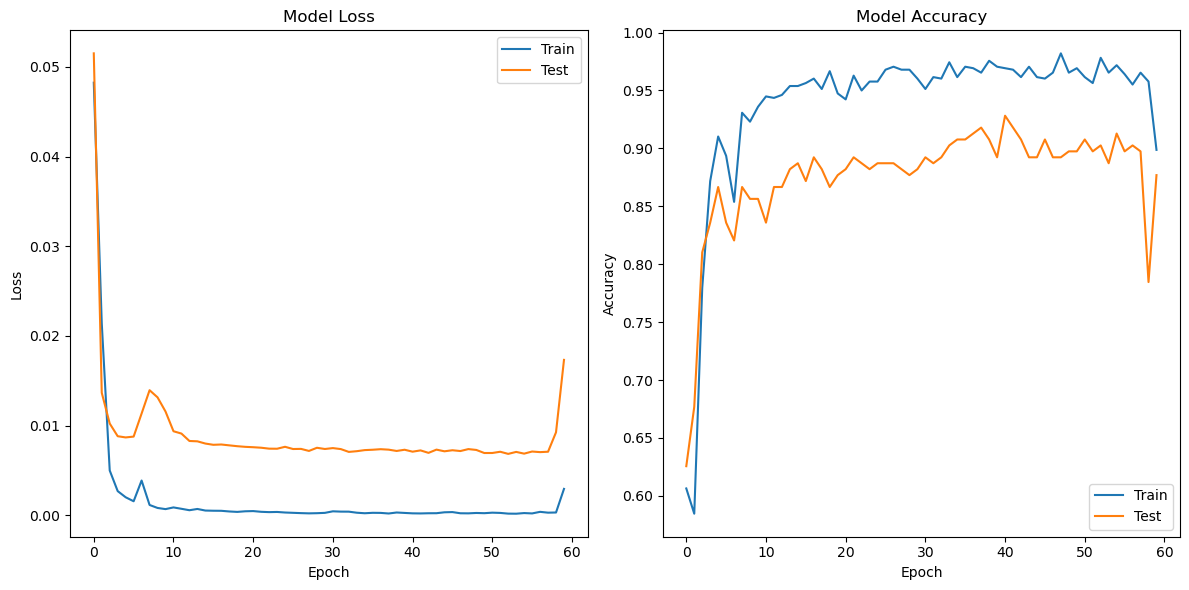

In [19]:
import matplotlib.pyplot as plt

# Assuming you have trained the model and stored the history object
# history = model.fit(...)

# Plot training & test loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  # Change to test_loss if it's named differently
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & test accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Change to test_accuracy if it's named differently
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [20]:
# Save the model weights
model.save_weights('model_weights.h5')


In [28]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

# Recreate the model
inception_resnet = InceptionResNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
inception_resnet.trainable = False

headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500, activation="relu")(headmodel)
headmodel = Dense(250, activation="relu")(headmodel)
headmodel = Dense(4, activation='sigmoid')(headmodel)

model = Model(inputs=inception_resnet.input, outputs=headmodel)

# Load the saved weights into the model
model.load_weights('model_weights.h5')

# Compile the model with the same optimizer, loss function, and metrics
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])


In [29]:
# Continue training with the loaded model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=148,
                    validation_data=(x_test, y_test), callbacks=[tfb])


Epoch 1/148
11/11 [==============================] - 116s 7s/step - loss: 0.0501 - accuracy: 0.6185 - val_loss: 0.0292 - val_accuracy: 0.6437
Epoch 2/148
11/11 [==============================] - 58s 5s/step - loss: 0.0187 - accuracy: 0.5867 - val_loss: 0.0285 - val_accuracy: 0.7356
Epoch 3/148
11/11 [==============================] - 58s 5s/step - loss: 0.0100 - accuracy: 0.7428 - val_loss: 0.0201 - val_accuracy: 0.7126
Epoch 4/148
11/11 [==============================] - 59s 5s/step - loss: 0.0049 - accuracy: 0.8266 - val_loss: 0.0179 - val_accuracy: 0.6207
Epoch 5/148
11/11 [==============================] - 58s 5s/step - loss: 0.0029 - accuracy: 0.8266 - val_loss: 0.0161 - val_accuracy: 0.8046
Epoch 6/148
11/11 [==============================] - 59s 5s/step - loss: 0.0022 - accuracy: 0.8699 - val_loss: 0.0168 - val_accuracy: 0.8391
Epoch 7/148
11/11 [==============================] - 59s 5s/step - loss: 0.0021 - accuracy: 0.9075 - val_loss: 0.0154 - val_accuracy: 0.7241
Epoch 8/148


11/11 [==============================] - 52s 5s/step - loss: 0.0010 - accuracy: 0.9393 - val_loss: 0.0154 - val_accuracy: 0.7471
Epoch 59/148
11/11 [==============================] - 51s 5s/step - loss: 0.0010 - accuracy: 0.9306 - val_loss: 0.0148 - val_accuracy: 0.8046
Epoch 60/148
11/11 [==============================] - 51s 5s/step - loss: 7.9665e-04 - accuracy: 0.9480 - val_loss: 0.0155 - val_accuracy: 0.7816
Epoch 61/148
11/11 [==============================] - 51s 5s/step - loss: 6.0825e-04 - accuracy: 0.9451 - val_loss: 0.0148 - val_accuracy: 0.7816
Epoch 62/148
11/11 [==============================] - 51s 5s/step - loss: 6.3545e-04 - accuracy: 0.9480 - val_loss: 0.0150 - val_accuracy: 0.7586
Epoch 63/148
11/11 [==============================] - 51s 5s/step - loss: 6.1979e-04 - accuracy: 0.9422 - val_loss: 0.0157 - val_accuracy: 0.7931
Epoch 64/148
11/11 [==============================] - 51s 5s/step - loss: 5.7412e-04 - accuracy: 0.9509 - val_loss: 0.0145 - val_accuracy: 0.8046

In [33]:
# Assuming x_test, y_test are your testing data
# Model evaluation on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')




3/3 [==============================] - 13s 4s/step - loss: 0.0143 - accuracy: 0.8046
Test Loss: 0.0143
Test Accuracy: 80.46%


1/1 [==============================] - 36s 36s/step


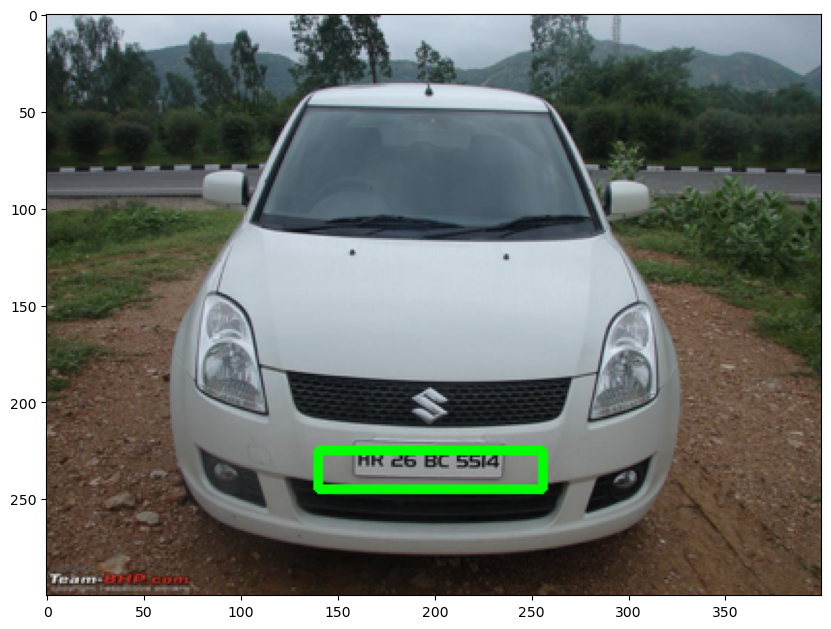

Predicted Coordinates: [[140 256 225 245]]


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np

# Provide the path to your test image
path = data_folder = "C:/Users/Mahesh/Desktop/m/dataset/Cars401.png"

def object_detection(path):
    # Read image
    image = load_img(path)  # PIL Object
    image = np.array(image, dtype=np.uint8)  # 8 bit array - Range(0,255)
    image1 = load_img(path, target_size=(224, 224))

    # Preprocessing
    image_arr_224 = img_to_array(image1) / 255.0  # Convert to array and normalize

    h, w, d = image.shape
    test_array = image_arr_224.reshape(1, 224, 224, 3)

    # Make Predictions
    coords = model.predict(test_array)
    denorm = np.array([w, w, h, h])

    # Denormalize the output
    coords = coords * denorm
    coords = coords.astype(np.int32)

    # Drawing a Bounding Box on top of this image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)

    cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)

    return image, coords

# Perform object detection on your test image
result_image, predicted_coords = object_detection(path)

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(result_image)
plt.show()

# You can also access the predicted coordinates if needed
print("Predicted Coordinates:", predicted_coords)


In [26]:
predicted_coords[0]

array([140, 256, 225, 245])

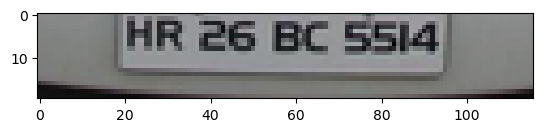

In [29]:
img = np.array(load_img(path))
xmin, xmax, ymin, ymax = predicted_coords[0]
roi = img[ymin:ymax,xmin:xmax]
plt.imshow(roi)
plt.show()

In [43]:
import pytesseract

In [46]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'


In [47]:
#extract text from image
text = pt.image_to_string(roi)
print(text)

gHR 26 BC S5i4}


